In [8]:
%pylab inline
import time
import scanpy
import pandas as pd
import seaborn as sns
sns.set_context('talk', font_scale=2)

from sklearn.manifold import MDS
from sklearn.cluster import SpectralClustering

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [2]:
def simulate_uniform_2d(n, low1=-1, high1=1, low2=-2, high2=2):
    """
    
    Parameters
    ----------
    n: integer
       Number of points
       
    d: integer
       Number of dimensions
    """
    X1 = np.random.random((n, 1)) * (high1-low1) + low1
    X2 = np.random.random((n, 1)) * (high2-low2) + low2
    return np.hstack([X1, X2])


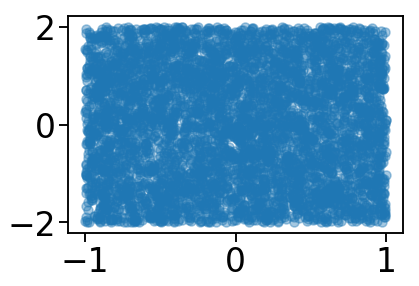

In [6]:
X1 = simulate_uniform_2d(5000, low1=-1, high1=1)
plt.scatter(X1[:,0], X1[:,1], alpha=0.4)

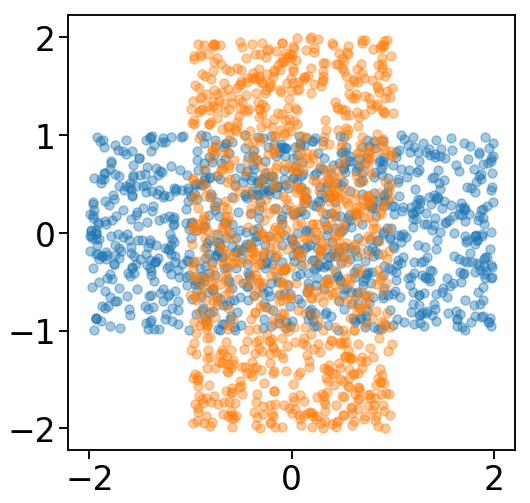

In [7]:
X1 = simulate_uniform_2d(1000, low1=-2, high1=2, low2=-1, high2=1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X1[:,0], X1[:,1], alpha=0.4)
X2 = simulate_uniform_2d(1000, low1=-1, high1=1, low2=-2, high2=2)
ax.scatter(X2[:,0], X2[:,1], alpha=0.4)


X = np.vstack([X1, X2])

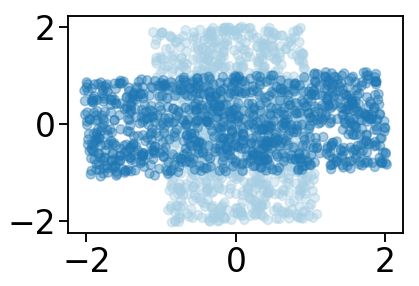

In [9]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X)
color = pd.Series([sns.color_palette('Paired')[0]]*1000 + [sns.color_palette('Paired')[1]]*1000)
colors = pd.Series(sns.color_palette('Paired'))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, alpha=0.4)

# Spectral Clustering

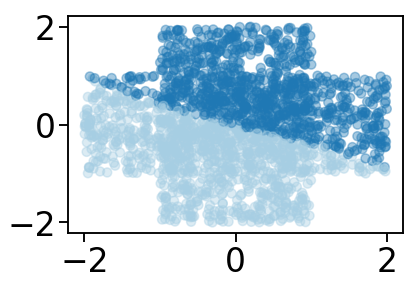

In [10]:
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0)
X_transformed = clustering.fit(X).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=colors[X_transformed], alpha=0.4)

In [ ]:



clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [(X, [0]*1000 + [1]*1000)]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=1000, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10, alpha=0.4)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors, alpha=0.4)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1


In [ ]:
from dipy.denoise.localpca import localpca
from dipy.denoise.pca_noise_estimate import pca_noise_estimate
from time import time


In [ ]:
sigma = pca_noise_estimate(data, gtab, correct_bias=True, smooth=3)


In [ ]:
print(pca_noise_estimate.__doc__)